In [2]:
%cd ..

/Users/alimustofa/Me/source-code/AI/YoloV8_Pose_Classification


In [3]:
# Import library
import cv2
import numpy as np
from PIL import Image
from src.detection_keypoint import DetectKeypoint
from src.classification_keypoint import KeypointClassification

In [5]:
detection_keypoint = DetectKeypoint()
classification_keypoint = KeypointClassification(
    '/Users/alimustofa/Me/source-code/AI/YoloV8_Pose_Classification/models/pose_classification.pth'
)

In [6]:
# run
image = cv2.imread('datasets/YogaPoses/Plank/00000006.jpg')
results = detection_keypoint(image)


0: 480x640 1 person, 364.4ms
Speed: 5.2ms preprocess, 364.4ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)


In [8]:
results.keypoints

ultralytics.yolo.engine.results.Keypoints object with attributes:

conf: tensor([[0.7899, 0.7937, 0.2482, 0.9449, 0.1217, 0.9980, 0.9811, 0.9925, 0.8230, 0.9281, 0.5657, 0.9987, 0.9965, 0.9950, 0.9875, 0.9579, 0.9409]])
data: tensor([[[5.8633e+01, 1.0204e+02, 7.8991e-01],
         [5.8660e+01, 9.6928e+01, 7.9370e-01],
         [5.8829e+01, 9.9412e+01, 2.4820e-01],
         [6.6185e+01, 8.8961e+01, 9.4487e-01],
         [6.8426e+01, 9.3497e+01, 1.2168e-01],
         [8.2417e+01, 1.0121e+02, 9.9797e-01],
         [9.0888e+01, 1.0272e+02, 9.8112e-01],
         [8.8254e+01, 1.4779e+02, 9.9248e-01],
         [1.0569e+02, 1.3726e+02, 8.2298e-01],
         [8.5369e+01, 1.8061e+02, 9.2814e-01],
         [1.0019e+02, 1.7714e+02, 5.6567e-01],
         [1.5619e+02, 1.1308e+02, 9.9870e-01],
         [1.5919e+02, 1.1963e+02, 9.9649e-01],
         [1.9825e+02, 1.4229e+02, 9.9502e-01],
         [1.9652e+02, 1.4273e+02, 9.8752e-01],
         [2.6905e+02, 1.5905e+02, 9.5790e-01],
         [2.6966e+02, 

In [119]:
results_keypoint = detection_keypoint.get_xy_keypoint(results)

input_classification = results_keypoint[10:]
results_classification = classification_keypoint(input_classification)
results_classification

'Plank'

Keypoint classification : Plank


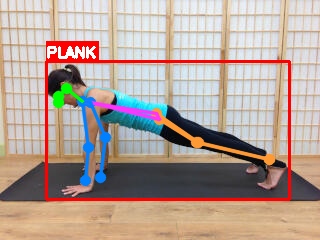

In [121]:
## Visualise Keypoint
height, width = image.shape[:2]

image_draw = results.plot(boxes=False)

x_min, y_min, x_max, y_max = results.boxes.xyxy[0].numpy()
image_draw = cv2.rectangle(
                image_draw, 
                (int(x_min), int(y_min)),(int(x_max), int(y_max)), 
                (0,0,255), 2
            )
(w, h), _ = cv2.getTextSize(
        results_classification.upper(), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
    )
image_draw = cv2.rectangle(
                image_draw, 
                (int(x_min), int(y_min)-20),(int(x_min)+w, int(y_min)), 
                (0,0,255), -1
            )
cv2.putText(image_draw,
            f'{results_classification.upper()}',
            (int(x_min), int(y_min)-4),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (255, 255, 255),
            thickness=2
        )

print(f'Keypoint classification : {results_classification}')
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))

In [ ]:
## Visualise Keypoint
height, width = image.shape[:2]

image_draw = image.copy()
for idx in range(0, len(results_keypoint), 2):
    x, y = results_keypoint[idx], results_keypoint[idx+1]
    if x == 0 or x == 1: continue
    if y == 0 or y == 1: continue
    x, y = int(x*width), int(y*height)
    # visualize point
    image_draw = cv2.circle(image_draw, (x,y), 2, (255,255,0), 2)
    image_draw = cv2.putText(image_draw, str(idx), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3,  (255,0,255),1)

print(f'Keypoint classification : {results_classification}')
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))